In [ ]:
#código para o desafio da disciplina FAM do bootcamp de MLE

In [1]:
import pandas as pd #biblioteca utilizada para trabalhar com dataframes
import numpy as np #biblioteca utilizada no tratamento de matrizes e vetores
import seaborn as sn #biblioteca utilizada pra plotar os gráficos em um formato mais "elegante"
import matplotlib.pyplot as plt  #biblioteca utilizada para plotar os gráficos

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

MessageError: ignored

In [2]:
df_compart_bikes=pd.read_csv('comp_bikes_mod.csv') #carregamento do df 
df_compart_bikes.head(10)  #exibindo as 10 primeiras linhas do df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.86,0.0000,NaN,2.0,3.0
8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.76,0.0000,8.0,6.0,14.0


- instant: identificador da leitura
- dteday : data
- season : estação (1:inverno, 2:primavera, 3:verão, 4:outono)
- yr : ano (0: 2011, 1:2012)
- mnth : mês ( 1 to 12)
- hr : hora (0 to 23)
- holiday : identificador para feriado 
- weekday : dia da semana
- workingday : 1 se é dia de semana e 0 caso contrário.
+ condições do tempo :
- 1: Ensolarado
- 2: Misto entre nuvens e ensolarado
- 3: Nevando ou com chuva fraca
- 4: Tempestade
- temp : temperatura em graus Celsius (medida) - normalizada
- atemp: sensação térmica - normalizada
- hum: umidade
- windspeed: velocidade do vento
- casual: número de usuários casuais
- registered: número de usuários registrados
- cnt: total de bikes alugadas



In [4]:
print('Dimensão do dataframe: {}'.format(df_compart_bikes.shape))

Dimensão do dataframe: (17379, 17)


In [5]:
df_compart_bikes.info() #mostra as características do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [6]:
print("Tipos de dados existentes do dataset: \n{}".format(df_compart_bikes.dtypes.value_counts()))

Tipos de dados existentes do dataset: 
float64    16
object      1
dtype: int64


In [7]:
print("Tipos de dados existentes do dataset: {}".format(df_compart_bikes.dtypes.nunique()))

Tipos de dados existentes do dataset: 2


In [8]:
print("Proporção de valores nulos para variável 'temp': {}% ".format((len(df_compart_bikes['temp'])/df_compart_bikes.isnull().sum()["temp"])))

Proporção de valores nulos para variável 'temp': 9.999424626006904% 


In [9]:
len(df_compart_bikes['temp'])/df_compart_bikes.isnull().sum()["temp"]

9.999424626006904

In [10]:
df_compart_bikes.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [11]:
#retirando as linhas que contém a data como nula
df_compart_bikes.dropna(subset=['dteday'],inplace=True)

In [12]:
df_compart_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [13]:
n_instancias, n_atributos=df_compart_bikes.shape  #verificando a quantidade de instancias e atributos
print("Número de Instancias e Atributos ({},{})".format(n_instancias,n_atributos))

Número de Instancias e Atributos (15641,17)


In [14]:
#encontrando a descrição "estatística" para as variáveis
df_compart_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
df_compart_bikes['season']=df_compart_bikes['season'].astype('category')  #transformando a coluna season (estações) em categóricos

In [16]:
df_compart_bikes.info() #verificando as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     14060 non-null  float64 
 1   dteday      15641 non-null  object  
 2   season      14061 non-null  category
 3   yr          14076 non-null  float64 
 4   mnth        14062 non-null  float64 
 5   hr          14068 non-null  float64 
 6   holiday     14076 non-null  float64 
 7   weekday     14078 non-null  float64 
 8   workingday  14097 non-null  float64 
 9   weathersit  14078 non-null  float64 
 10  temp        14066 non-null  float64 
 11  atemp       14076 non-null  float64 
 12  hum         14070 non-null  float64 
 13  windspeed   14082 non-null  float64 
 14  casual      14071 non-null  float64 
 15  registered  14090 non-null  float64 
 16  cnt         14079 non-null  float64 
dtypes: category(1), float64(15), object(1)
memory usage: 2.0+ MB


In [18]:
print("Existem {} estações diferentes no dataset".format(df_compart_bikes['season'].nunique()))

Existem 4 estações diferentes no dataset


In [19]:
df_compart_bikes['dteday'] = pd.to_datetime(df_compart_bikes.dteday) #convertendo a string data para o tipo de data

In [20]:
df_compart_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [21]:
print("Maior data existente no dataset {}".format(df_compart_bikes['dteday'].max())) #encontrando o maior valor de data existente no dataset

Maior data existente no dataset 2012-12-31 00:00:00


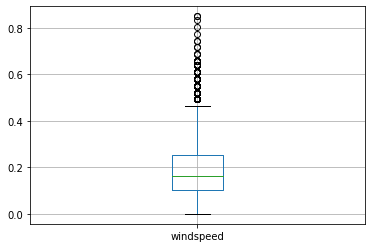

In [22]:
df_compart_bikes.boxplot(['windspeed']) #boxplot para a velocidade do vento (['windspeed'])

In [23]:
#selecionando as colunas "season", "temp", "atemp", "hum", "windspeed", "cnt"
df_compart_bikes_filtrado=df_compart_bikes[["season", "temp", "atemp", "hum", "windspeed","cnt"]]

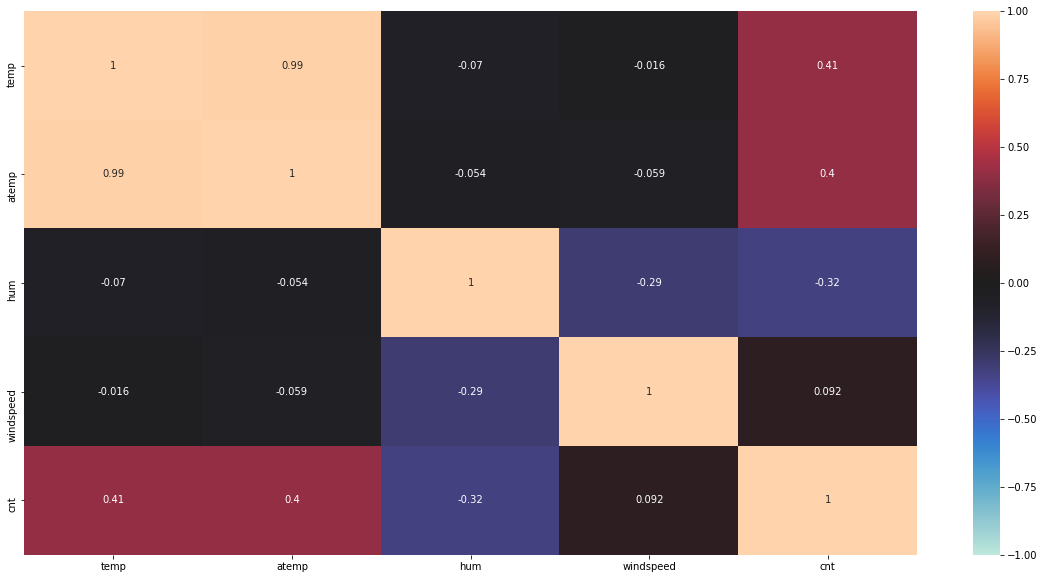

In [24]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(20, 10))
matriz_de_correlação = df_compart_bikes_filtrado.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [25]:
#substituindo o valor médio para as colunas "hum","cnt","casual"
df_compart_bikes_regressao=df_compart_bikes[['hum','cnt','casual']] #filtrando os valores necessários (selecionando as variáveis 'hum','cnt','casual' )
df_compart_bikes_regressao.fillna(df_compart_bikes_regressao.mean(), inplace=True)  #aplicando a modificação para os valores nulos
df_compart_bikes_regressao.isnull().sum()  #avaliando se os valores foram preenchidos

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


hum       0
cnt       0
casual    0
dtype: int64

In [26]:
#selecionando as variáveis para os modelos de regressão 
entradas_regressao=df_compart_bikes_regressao[['hum','casual']] #variáveis independentes
saida_regressao=df_compart_bikes_regressao['cnt'] #variáveis dependentes

In [27]:
entradas_regressao.shape

(15641, 2)

In [28]:
#importa o modelo de regressão linear 
from sklearn.linear_model import LinearRegression

In [29]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
regressao= reg.fit (entradas_regressao,saida_regressao) # encontra os coeficientes (realiza a regressão)

In [30]:
#realiza a previsão
previsao=reg.predict(entradas_regressao)

In [31]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [33]:
#parâmetros encontrados
print('Y = {}X1 + {}X2 + {}'.format(reg.coef_[0],reg.coef_[1],reg.intercept_))

R_2 = r2_score(saida_regressao, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = -99.75012327908327X1 + 2.215121974254656X2 + 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


In [34]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor 

In [35]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(entradas_regressao, saida_regressao) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(entradas_regressao)

In [37]:
#parâmetros encontrados
R_2 = r2_score(saida_regressao, previsao_arvore)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2) para a árvore:", R_2)


Coeficiente de Determinação (R2) para a árvore: 0.7098339715834964


In [38]:
#plotando as decisões tomadas pela árvore de decisão
from sklearn import tree #importando a biblioteca para as árvores de decisão
import pydotplus #biblioteca utilizada como interface para plotar as decisões da árvore de decisão
dot_data = tree.export_graphviz(arvore_regressora, out_file=None)
grafico = pydotplus.graph_from_dot_data(dot_data)
grafico.write_pdf("bikeshare.pdf")

True

In [ ]:
#for col in df_compart_bikes.columns:
#    df_compart_bikes.loc[df_compart_bikes.sample(frac=0.1).index, col] = pd.np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [ ]:
#df_compart_bikes.to_csv('comp_bikes_mod.csv',index=False)